In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # data visualization
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

<AxesSubplot:>

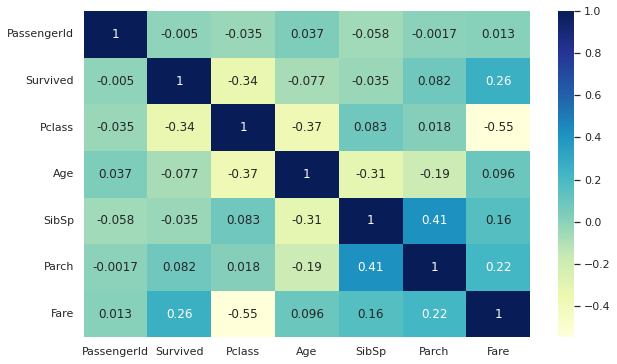

In [3]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

In [4]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print('train')
train_data.info()
print('-'*50)
print('test')
test_data.info()

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -

In [6]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_data = test_data.drop(['Name', 'Ticket'], axis=1)

In [7]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
#???
pclass_train_dummies = pd.get_dummies(train_data['Pclass'])
pclass_test_dummies = pd.get_dummies(test_data['Pclass'])

train_data.drop(['Pclass'], axis=1, inplace=True)
test_data.drop(['Pclass'], axis=1, inplace=True)

train_data = train_data.join(pclass_train_dummies)
test_data = test_data.join(pclass_test_dummies)

In [9]:
sex_train_dummies = pd.get_dummies(train_data['Sex'])
sex_test_dummies = pd.get_dummies(test_data['Sex'])
sex_train_dummies.columns = ['Female', 'Male']
sex_test_dummies.columns = ['Female', 'Male']
train_data.drop(['Sex'], axis=1, inplace=True)
test_data.drop(['Sex'], axis=1, inplace=True)
train_data = train_data.join(sex_train_dummies)
test_data = test_data.join(sex_test_dummies)

In [10]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [11]:
test_data['Fare'].fillna(0, inplace=True)

In [12]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [13]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
test_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [15]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [16]:
#???
embarked_train_dummies = pd.get_dummies(train_data['Embarked'])
embarked_test_dummies = pd.get_dummies(test_data['Embarked'])

embarked_train_dummies.columns = ['S', 'C', 'Q']
embarked_test_dummies.columns = ['S', 'C', 'Q']

train_data.drop(['Embarked'], axis=1, inplace=True)
test_data.drop(['Embarked'], axis=1, inplace=True)

train_data = train_data.join(embarked_train_dummies)
test_data = test_data.join(embarked_test_dummies)

In [17]:
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis=1).copy()

In [18]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9820426487093153